<a href="https://colab.research.google.com/github/aldonat/SIB_BISA-AI-Academy/blob/main/Klasifikasi_Obesitas_dengan_Keras_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SIB - Bisa AI Academy/NLP/DAY 4 - Deep Learning/Deep Learning dengan Keras Python/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.shape

(2111, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   int64  
 12  FAF                             2087 no

In [ ]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.duplicated().sum()

24

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
encoded_mappings = {}
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
        encoded_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mencetak hasil mapping untuk setiap kolom
for column, mapping in encoded_mappings.items():
    print(f"Mapping untuk kolom '{column}': {mapping}")

Mapping untuk kolom 'Gender': {'Female': 0, 'Male': 1}
Mapping untuk kolom 'CALC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
Mapping untuk kolom 'FAVC': {'no': 0, 'yes': 1}
Mapping untuk kolom 'SCC': {'no': 0, 'yes': 1}
Mapping untuk kolom 'SMOKE': {'no': 0, 'yes': 1}
Mapping untuk kolom 'family_history_with_overweight': {'no': 0, 'yes': 1}
Mapping untuk kolom 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
Mapping untuk kolom 'MTRANS': {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
Mapping untuk kolom 'NObeyesdad': {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


<ipython-input-57-540491006c2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-57-540491006c2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-57-540491006c2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   int64  
 12  FAF                             2087 no

PreProcesing

In [ ]:
X = df.drop('NObeyesdad', axis =1)
y = df[['NObeyesdad']]

In [ ]:
X

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3


In [ ]:
y.head()

,NObeyesdad
0,1
1,1
2,1
3,5
4,6


In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X[0,:]

array([-0.52661297, -1.00817911, -0.88740784, -0.87298467,  1.41183596,
       -2.75471911, -0.7883642 ,  0.39090615, -0.21958364, -0.14675475,
       -0.00780979,  0.46039422, -1.1869768 ,  0.55421113,  0.31812802,
        0.50676794])

In [ ]:
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print(y[:4])

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1878, 16) (1878, 7)
(209, 16) (209, 7)


Model Deep Neural Network

In [ ]:
model = Sequential() #Model
model.add(InputLayer(input_shape=(16,))) #Input Layer
model.add(Dense(16, activation='relu')) #Hidden Layer 1
model.add(Dense(16, activation='relu')) #Hidden Layer 2
model.add(Dense(8, activation='relu')) #Hidden Layer 3
model.add(Dense(7, activation='softmax')) #Output Layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 7)                 63        
                                                                 
Total params: 743 (2.90 KB)
Trainable params: 743 (2.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.1, shuffle=True,
                    epochs=100)

Epoch 1/100
53/53 [==============================] - 2s 11ms/step - loss: 1.8521 - accuracy: 0.2888 - val_loss: 1.7553 - val_accuracy: 0.3298
Epoch 2/100
53/53 [==============================] - 0s 5ms/step - loss: 1.6364 - accuracy: 0.4314 - val_loss: 1.5362 - val_accuracy: 0.4202
Epoch 3/100
53/53 [==============================] - 0s 6ms/step - loss: 1.4191 - accuracy: 0.4852 - val_loss: 1.3281 - val_accuracy: 0.5053
Epoch 4/100
53/53 [==============================] - 0s 5ms/step - loss: 1.2457 - accuracy: 0.5432 - val_loss: 1.1753 - val_accuracy: 0.5479
Epoch 5/100
53/53 [==============================] - 0s 5ms/step - loss: 1.1036 - accuracy: 0.5923 - val_loss: 1.0305 - val_accuracy: 0.6489
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 0.9876 - accuracy: 0.6249 - val_loss: 0.9310 - val_accuracy: 0.6862
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 0.8918 - accuracy: 0.6574 - val_loss: 0.8382 - val_accuracy: 0.7181
Epoch 8/100


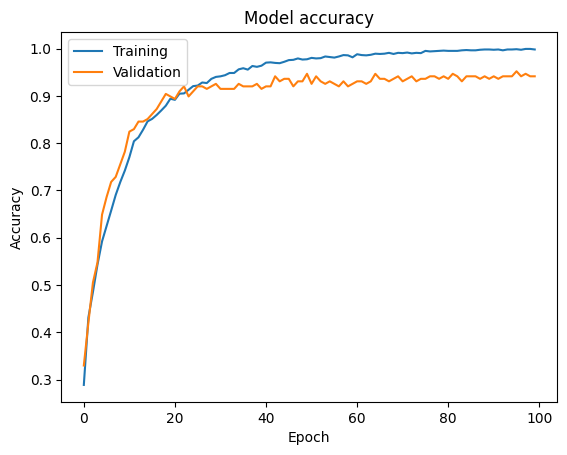

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

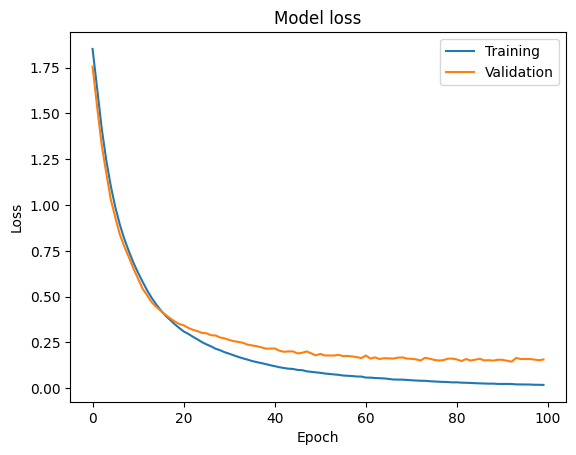

In [ ]:
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'],label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Predict

In [ ]:
y_pred = model.predict(X_test)


7/7 [==============================] - 0s 2ms/step


In [ ]:
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

print(pred[:4])
print(test[:4])

[3, 1, 6, 3]
[3, 1, 6, 3]


EValuation

In [ ]:
accuracy_score(test,pred)

0.9712918660287081

In [ ]:
print(classification_report(test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.93      0.96        28
           2       0.98      0.98      0.98        42
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       0.87      1.00      0.93        27
           6       0.96      0.90      0.93        30

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209



<Axes: >

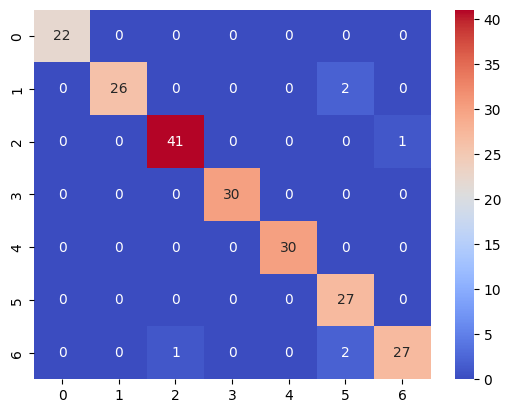

In [ ]:
cm = confusion_matrix(test,pred)
sns.heatmap(cm,annot=True,cmap='coolwarm')